<a href="https://colab.research.google.com/github/there-exist/thereexist_/blob/master/2019_11_26_jumping_process_%3D_poisson_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np

'''
Q라고 이름을 기입했더니 Question을 의미하는 용어와 혼동을 빚어 이후에 문제가 생겼다.(total_tensor를 만들 때)
그래서 이름을 Qu로 바꿨다.

때로는 이름을 어떻게 기입하는지가 중요한 모양이다.
'''
def Qu(N):
  Qu = np.zeros((N+1,N+1))

  for i in range(0,N+1):
    for k in range(0,N+1):
        
      if k == 0:

        Qu[i,k] = np.sqrt(1/(N+1))*np.cos((i+0.5)*k*np.pi/(N+1))

      else:

        Qu[i,k] = np.sqrt(2/(N+1))*np.cos((i+0.5)*k*np.pi/(N+1))

  return Qu

print(Qu(3))

[[ 0.5         0.65328148  0.5         0.27059805]
 [ 0.5         0.27059805 -0.5        -0.65328148]
 [ 0.5        -0.27059805 -0.5         0.65328148]
 [ 0.5        -0.65328148  0.5        -0.27059805]]


In [0]:
def M(N):

  M = np.zeros((N+1,N+1))

  for i in range(0,N+1):
    for k in range(0,N+1):

      if i == k:

        M[i,k] = 4 * (np.sin(k*np.pi / (2*(N+1))))**2
      
  
  return M

In [0]:
def A(N):
  return np.round(np.dot(Qu(N),np.dot(M(N),Qu(N).T)),5)

In [81]:
print(M(3))

print(A(10))

[[0.         0.         0.         0.        ]
 [0.         0.58578644 0.         0.        ]
 [0.         0.         2.         0.        ]
 [0.         0.         0.         3.41421356]]
[[ 1. -1. -0.  0. -0. -0. -0. -0.  0. -0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0. -0.  0. -0.]
 [-0. -1.  2. -1. -0. -0. -0. -0. -0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0. -0.  0.  0. -0.]
 [-0.  0. -0. -1.  2. -1. -0.  0. -0. -0.  0.]
 [-0.  0. -0.  0. -1.  2. -1. -0.  0. -0. -0.]
 [-0.  0. -0.  0. -0. -1.  2. -1. -0. -0.  0.]
 [-0.  0. -0. -0.  0. -0. -1.  2. -1.  0.  0.]
 [ 0. -0. -0.  0. -0.  0. -0. -1.  2. -1. -0.]
 [-0.  0.  0. -0. -0. -0. -0.  0. -1.  2. -1.]
 [ 0. -0.  0. -0.  0. -0.  0.  0. -0. -1.  1.]]


우선은 jumping rate를 power law를 써서 표시를 해보려고 했는데, upper incomplete gamma function 등이 나오면서 어려움을 겪고 있다.

우선은 지금 하고 있는 것이 잘 되고 있는 것인지를 판단하기 위해,

jumping probability를 가장 쉬운 형태인 poisson으로 가정을 하고 풀어보자


In [9]:
from sympy import *
from sympy.abc import k,t,u

psi = laplace_transform(k*exp(-k*t),t,u)

print(psi)


(k/(k + u), 0, Abs(periodic_argument(k, oo)) <= pi/2)


굳이 할 필요는 없었지만 poisson process로 되어있는 상황에서 laplace transformation을 sympy로 수행을 해봤다.


In [0]:
def D(u,k):

  psi = k / (k + u)

  return u*psi / (1- psi)



Diffusion kernal $D(u)$ 는

$u\hat\psi(u)/(1-\hat\psi(u))$

의 식을 가진다. 

지금의 경우에는 (poisson process를 가정한 상황)

$\hat\psi(u) = k / (K+u)$

이기 때문에 단순히 식을 대입해주면 된다.

In [83]:
print(D(5,0.1))

0.10000000000000002


In [86]:
def U_minus_DM_inverse(u, k, N):

  m = M(N)

  result = np.zeros((N+1, N+1))

  for i in range(0,N+1):

    result[i,i] = (u - D(u,k)* m[i,i])**-1
  
  return result

print(U_minus_DM_inverse(10, 1, 5))

[[0.1        0.         0.         0.         0.         0.        ]
 [0.         0.10275327 0.         0.         0.         0.        ]
 [0.         0.         0.11111111 0.         0.         0.        ]
 [0.         0.         0.         0.125      0.         0.        ]
 [0.         0.         0.         0.         0.14285714 0.        ]
 [0.         0.         0.         0.         0.         0.15954182]]


$Inverse(u-D(u)M)$ 의 식을 define 해줬다.

In [87]:
for i in range(1,10):
  print(U_minus_DM_inverse(10*i, 1, 5))
  print('u =',i*10)

[[0.1        0.         0.         0.         0.         0.        ]
 [0.         0.10275327 0.         0.         0.         0.        ]
 [0.         0.         0.11111111 0.         0.         0.        ]
 [0.         0.         0.         0.125      0.         0.        ]
 [0.         0.         0.         0.         0.14285714 0.        ]
 [0.         0.         0.         0.         0.         0.15954182]]
u = 10
[[0.05       0.         0.         0.         0.         0.        ]
 [0.         0.05067897 0.         0.         0.         0.        ]
 [0.         0.         0.05263158 0.         0.         0.        ]
 [0.         0.         0.         0.05555556 0.         0.        ]
 [0.         0.         0.         0.         0.05882353 0.        ]
 [0.         0.         0.         0.         0.         0.06147056]]
u = 20
[[0.03333333 0.         0.         0.         0.         0.        ]
 [0.         0.03363374 0.         0.         0.         0.        ]
 [0.         0.   

In [0]:
def total_tensor(u, k, N):

  k = U_minus_DM_inverse(u,k,N)

  return np.dot(Qu(N),np.dot(k,Qu(N).T))


In [89]:
print(total_tensor(10, 1, 3))

[[ 0.11270161 -0.01431452  0.00181452 -0.00020161]
 [-0.01431452  0.12883065 -0.01633065  0.00181452]
 [ 0.00181452 -0.01633065  0.12883065 -0.01431452]
 [-0.00020161  0.00181452 -0.01431452  0.11270161]]


In [90]:
print(total_tensor(20,1,10)[:,5])

[-2.83721909e-08  5.39071628e-07 -9.67491711e-06  1.73609436e-04
 -3.11529494e-03  5.59016994e-02 -3.11529494e-03  1.73609436e-04
 -9.67491711e-06  5.39071628e-07 -2.83721910e-08]


In [0]:
U = np.linspace(0,1000)

def Greenfunction(u,k,N,n,m):

  return total_tensor(u, k, N)[n,m]


In [92]:
print(Greenfunction(5,1,100,45,50))


-0.003636123247412289


In [93]:
import matplotlib.pyplot as plt

print(Greenfunction(10,1,100,45,50))

-4.268032432149157e-06


In [94]:
plt.plot(Greenfunction(U,1,100,45,50))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


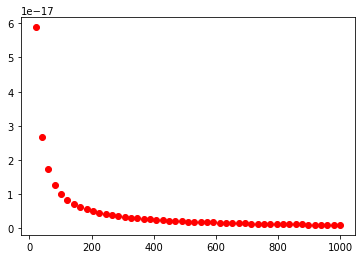

In [95]:
for i in U:
  plt.plot(i,Greenfunction(i,1,100,10,50),'ro')

plt.show()

In [96]:
print(Greenfunction(10,1,100,10,50))

1.5110448323458462e-16


In [97]:
print(Greenfunction(10,1,100,50,50))

0.12909944487358055


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


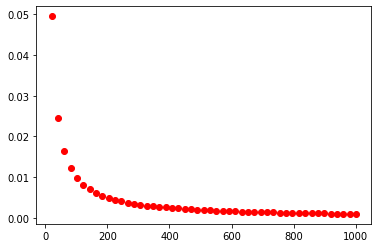

In [98]:
for i in U:
  plt.plot(i,Greenfunction(i,0.1,100,50,50),'ro')

plt.show()

In [0]:
def Greenfunction_matrix(u,k,N,m):

  return total_tensor(u, k, N)[:,m]

u = 200


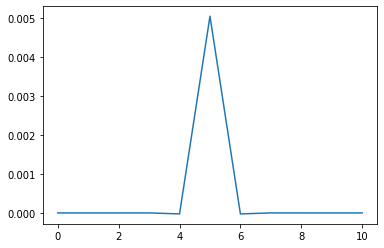

u = 400


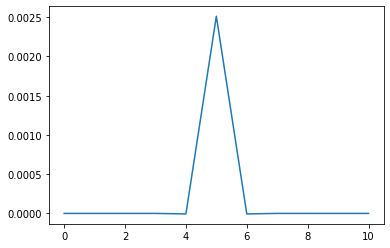

u = 600


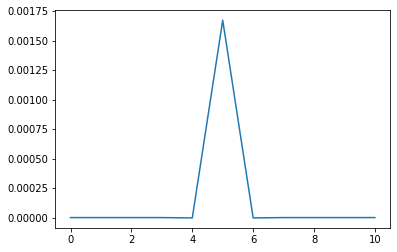

u = 800


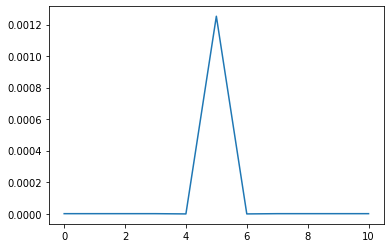

u = 1000


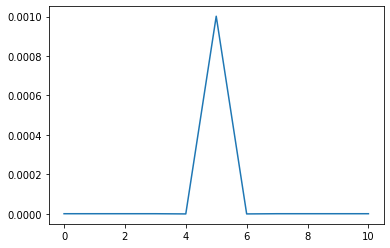

u = 1200


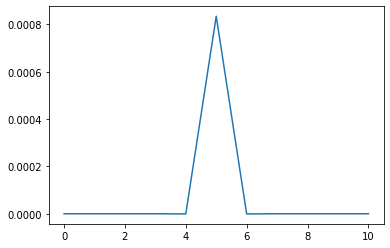

u = 1400


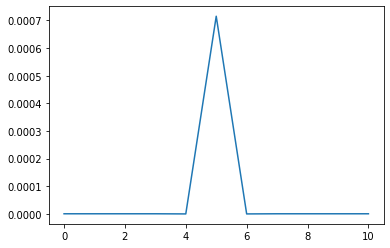

u = 1600


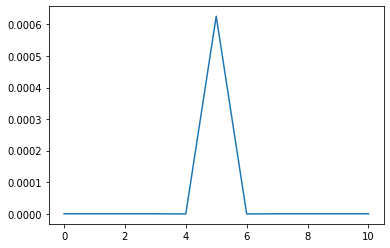

u = 1800


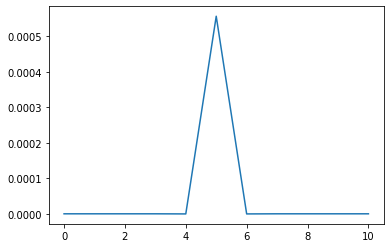

In [104]:
for i in range(1,10):
  plt.plot(Greenfunction_matrix(200*i,1,10,5))
  print('u =', i*200)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


m = 50
n = 5


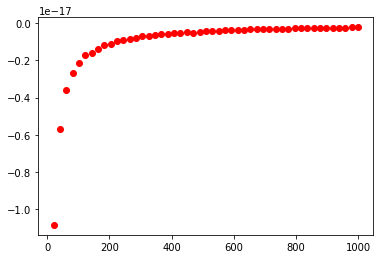

m = 50
n = 10


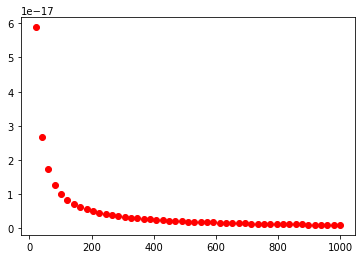

m = 50
n = 15


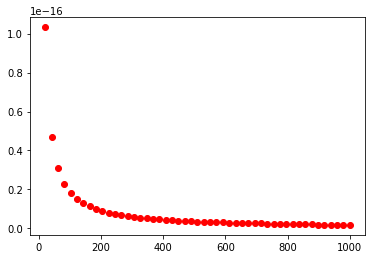

m = 50
n = 20


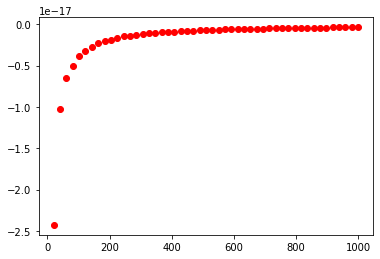

m = 50
n = 25


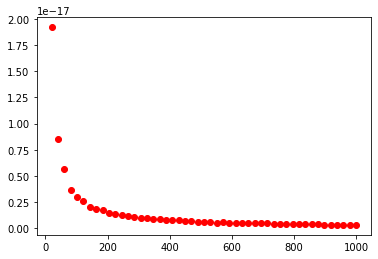

m = 50
n = 30


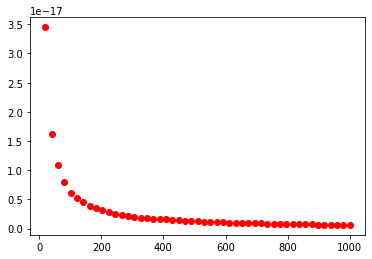

m = 50
n = 35


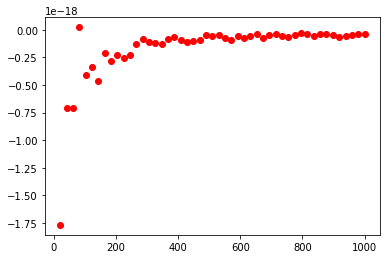

m = 50
n = 40


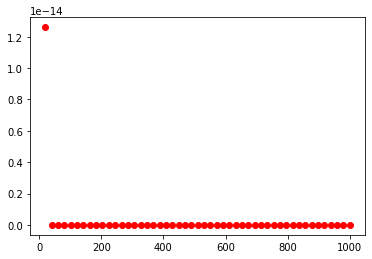

m = 50
n = 45


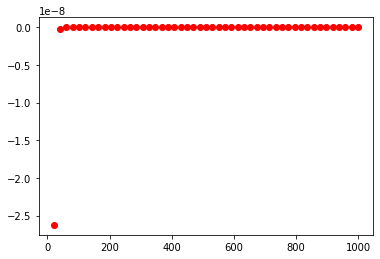

In [112]:
for j in range(1,10):
  for i in U:
    plt.plot(i,Greenfunction(i,1,100,5*j,50),'ro')

  print('m =', 50)
  print('n =', 5*j)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


m = 50
n = 5


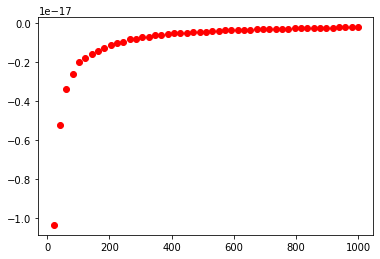

m = 50
n = 10


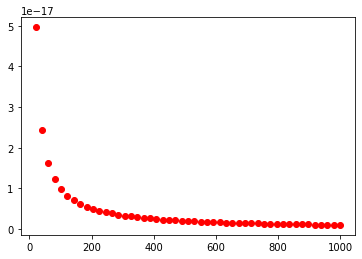

m = 50
n = 15


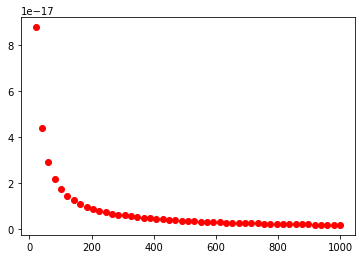

m = 50
n = 20


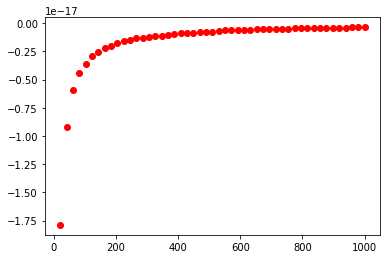

m = 50
n = 25


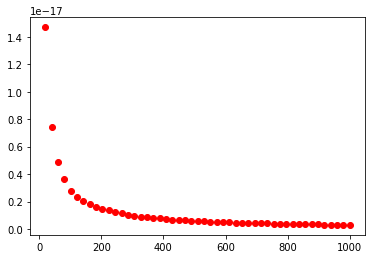

m = 50
n = 30


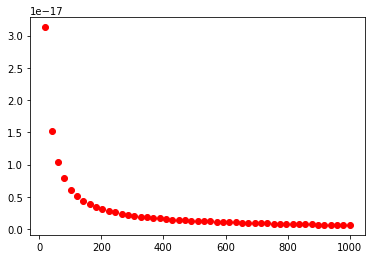

m = 50
n = 35


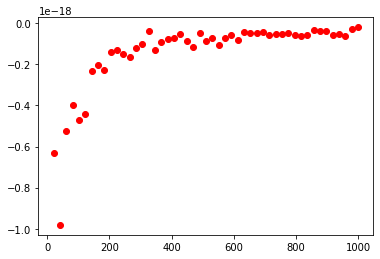

m = 50
n = 40


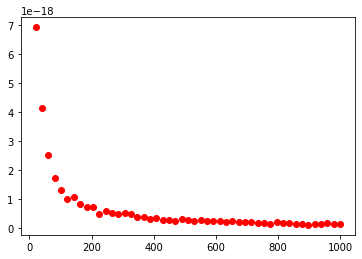

m = 50
n = 45


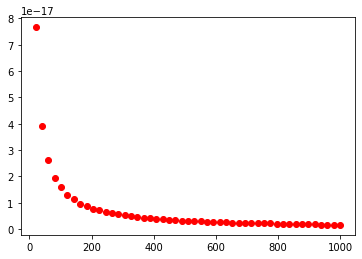

In [113]:
for j in range(1,10):
  for i in U:
    plt.plot(i,Greenfunction(i,0.01,100,5*j,50),'ro')

  print('m =', 50)
  print('n =', 5*j)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


m = 50
n = 5


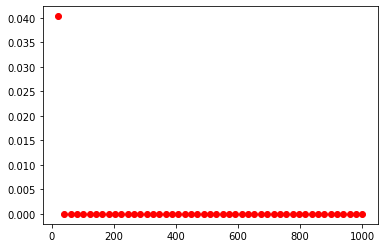

m = 50
n = 10


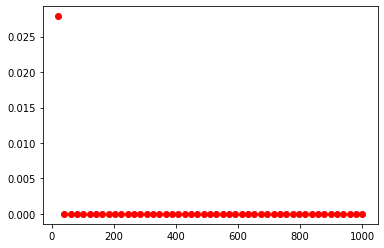

m = 50
n = 15


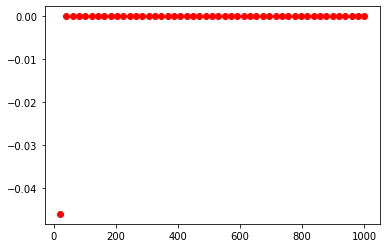

m = 50
n = 20


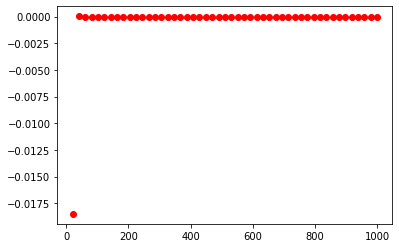

m = 50
n = 25


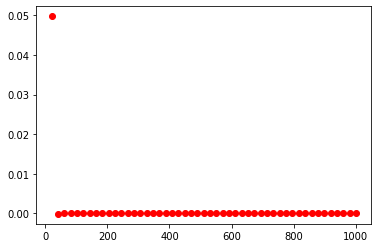

m = 50
n = 30


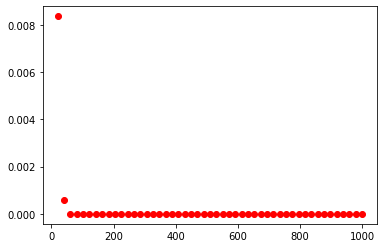

m = 50
n = 35


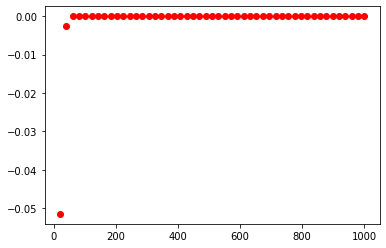

m = 50
n = 40


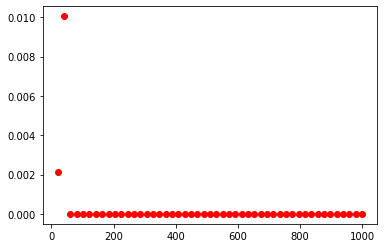

m = 50
n = 45


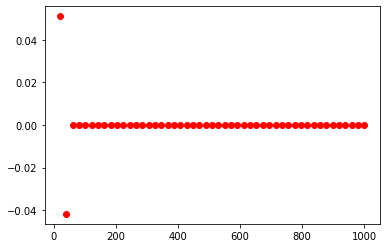

In [114]:
for j in range(1,10):
  for i in U:
    plt.plot(i,Greenfunction(i,10,100,5*j,50),'ro')

  print('m =', 50)
  print('n =', 5*j)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


m = 50
n = 5


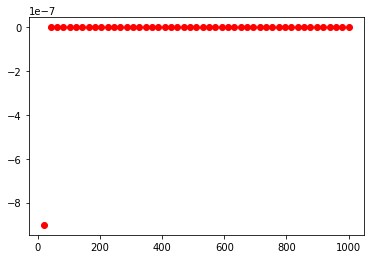

m = 50
n = 10


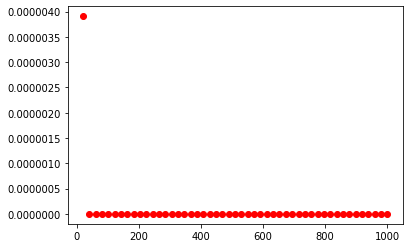

m = 50
n = 15


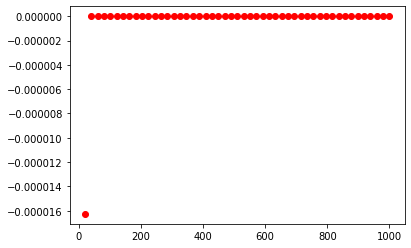

m = 50
n = 20


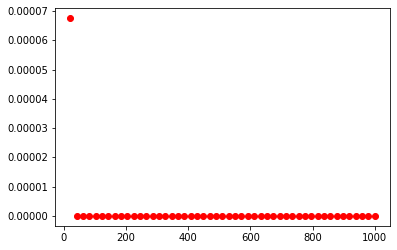

m = 50
n = 25


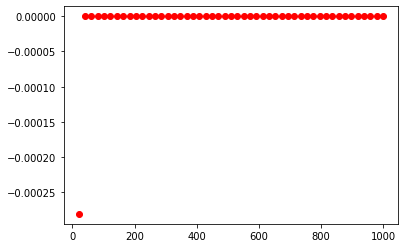

m = 50
n = 30


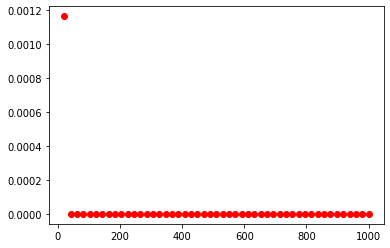

m = 50
n = 35


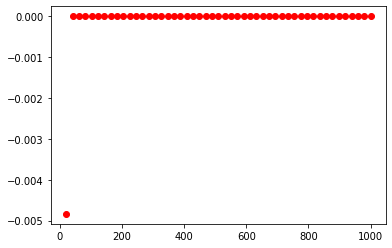

m = 50
n = 40


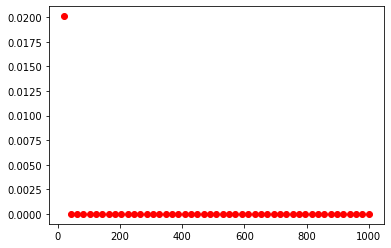

m = 50
n = 45


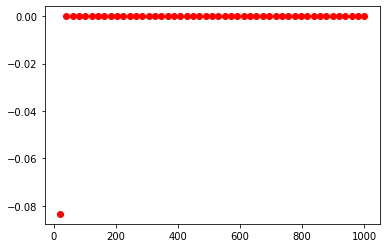

In [115]:
for j in range(1,10):
  for i in U:
    plt.plot(i,Greenfunction(i,5,100,5*j,50),'ro')

  print('m =', 50)
  print('n =', 5*j)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


m = 50
n = 5


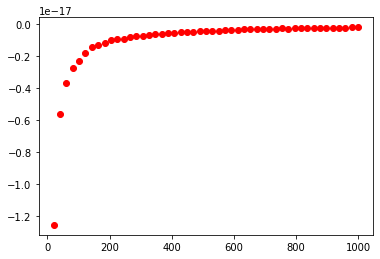

m = 50
n = 10


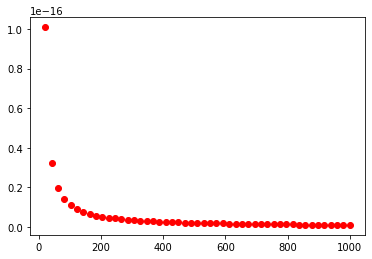

m = 50
n = 15


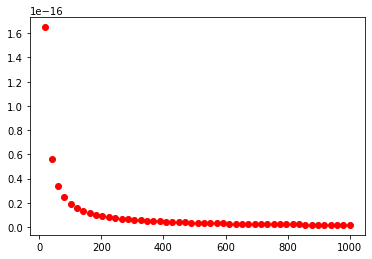

m = 50
n = 20


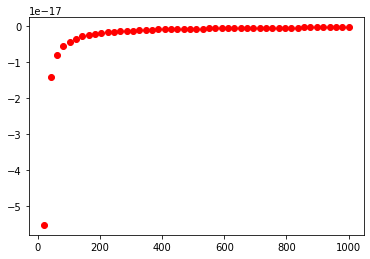

m = 50
n = 25


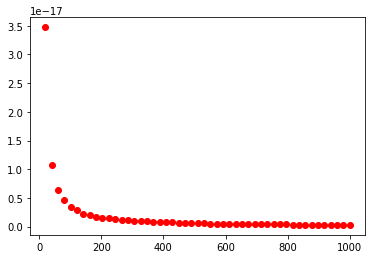

m = 50
n = 30


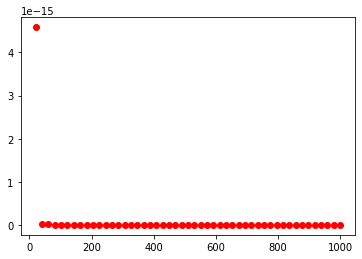

m = 50
n = 35


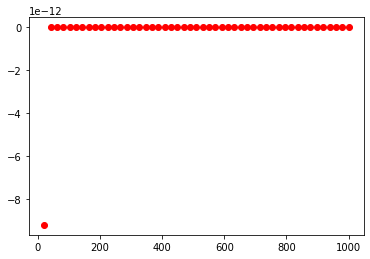

m = 50
n = 40


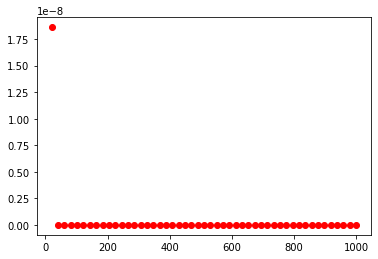

m = 50
n = 45


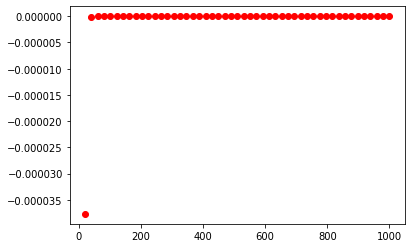

In [116]:
for j in range(1,10):
  for i in U:
    plt.plot(i,Greenfunction(i,3,100,5*j,50),'ro')

  print('m =', 50)
  print('n =', 5*j)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


m = 50
n = 0


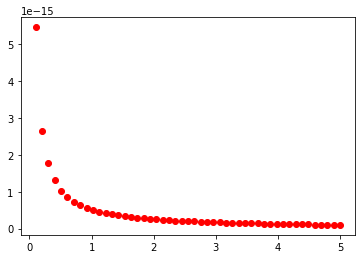

m = 50
n = 5


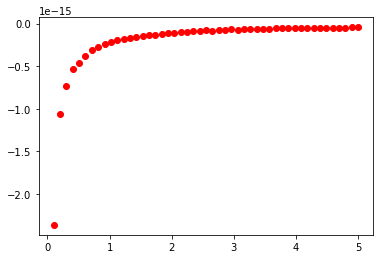

m = 50
n = 10


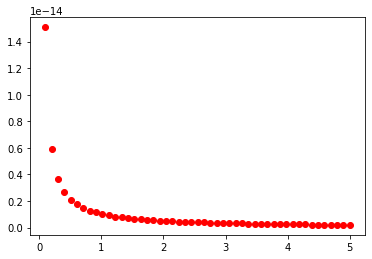

m = 50
n = 15


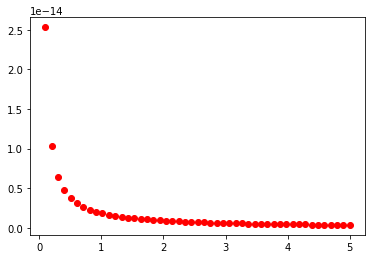

m = 50
n = 20


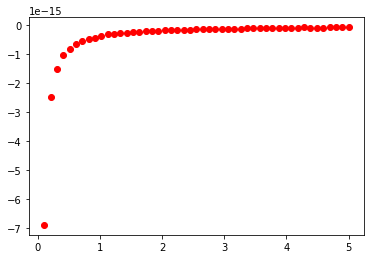

m = 50
n = 25


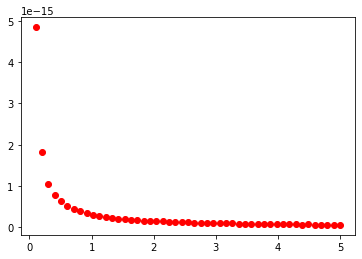

m = 50
n = 30


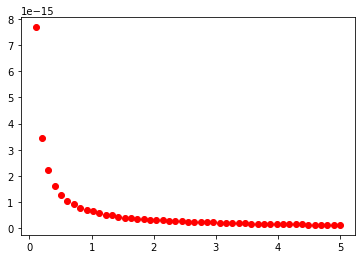

m = 50
n = 35


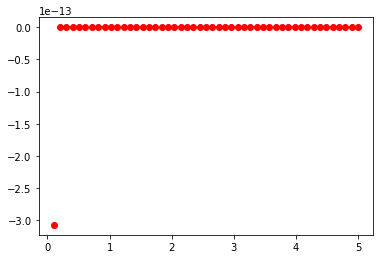

m = 50
n = 40


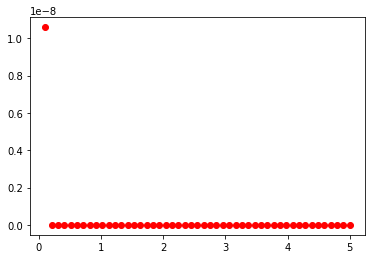

m = 50
n = 45


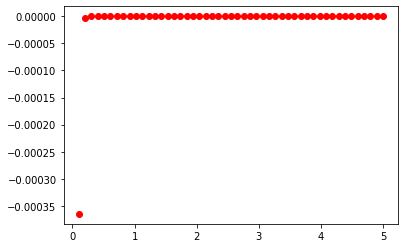

m = 50
n = 50


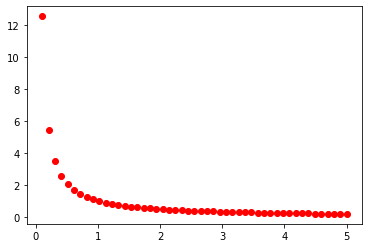

In [123]:
U = np.linspace(0,5)

for j in range(0,11):
  for i in U:
    plt.plot(i,Greenfunction(i,0.01,100,5*j,50),'ro')

  print('m =', 50)
  print('n =', 5*j)
  plt.show()

In [124]:
sum = np.sum(Greenfunction_matrix(200,1,10,5))
print(sum)

0.005


In [125]:
for i in range(1,10):
  print('for u =', 200*i , 'case,')
  sum = np.sum(Greenfunction_matrix(200*i,1,10,5))
  print(sum*200*i)


for u = 200 case,
1.0
for u = 400 case,
0.9999999999999999
for u = 600 case,
0.9999999999999998
for u = 800 case,
0.9999999999999999
for u = 1000 case,
1.0
for u = 1200 case,
1.0
for u = 1400 case,
0.9999999999999998
for u = 1600 case,
0.9999999999999999
for u = 1800 case,
1.0


n = 0에서부터 N까지 모든 G를 더할 경우, 정의에 의해

$\sum \hat G_n(u,m) = 1/u$

가 되어야 된다.

확인해본 결과, 내 code는 그것을 만족하고 있다. 이는 좋은 징조로 볼 수 있을 것이다.

이번에는 time domain으로 바꿔보자.

내 생각이 맞다면, 

$\hat G(u,m) = (Matrix-operator) G(t=0,m)$

에서 Matrix operator 부분이

$(Matrix-operator) = QK(u)Q^T$

로 되어있기에, K에만 inverse laplace transformation을 취해주면 된다.


In [127]:
def Inverse_laplace_of_U_minus_DM_inverse(t, k, N):

  m = M(N)

  result = np.zeros((N+1, N+1))

  for i in range(0,N+1):

    result[i,i] = np.exp(k*m[i,i]*t)
  
  return result

print(Inverse_laplace_of_U_minus_DM_inverse(10, 1, 3))

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.49975928e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.85165195e+08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.72575591e+14]]


In [0]:
def Inverse_laplace_of_total_tensor(t, k, N):

  w = Inverse_laplace_of_U_minus_DM_inverse(t,k,N)

  return np.dot(Qu(N),np.dot(w,Qu(N).T))


In [0]:
def time_domain_Greenfunction(t,k,N,n,m):

  return Inverse_laplace_of_total_tensor(t, k, N)[n,m]

m = 50
n = 0


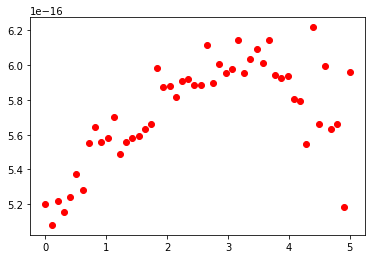

m = 50
n = 10


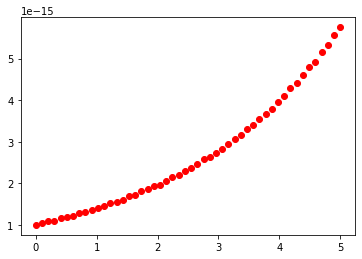

m = 50
n = 20


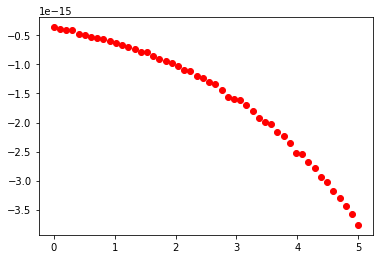

m = 50
n = 30


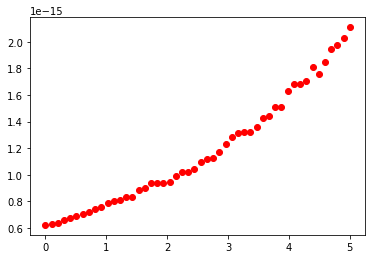

m = 50
n = 40


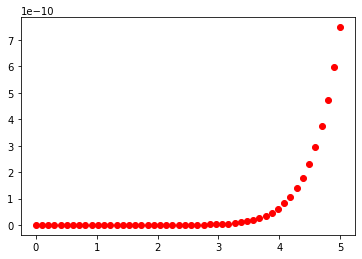

m = 50
n = 50


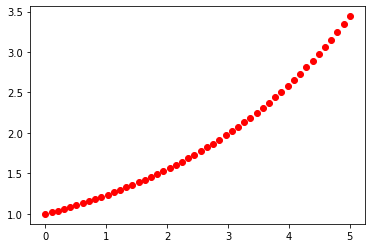

m = 50
n = 60


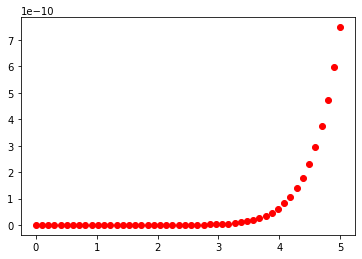

m = 50
n = 70


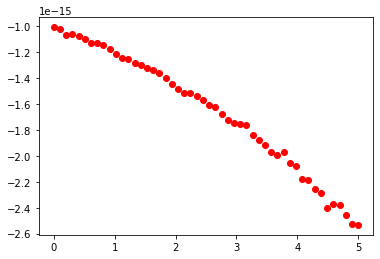

m = 50
n = 80


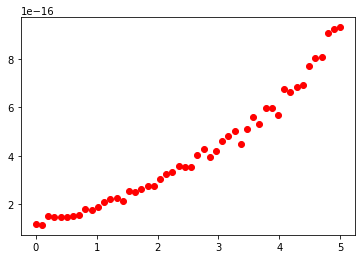

m = 50
n = 90


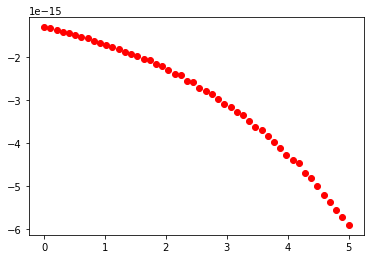

In [137]:
t = np.linspace(0,5)

for j in range(0,10):
  for i in U:
    plt.plot(i,time_domain_Greenfunction(i,0.1,100,10*j,50),'ro')

  print('m =', 50)
  print('n =', 10*j)
  plt.show()